In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv(r'C:\Users\Newton\Documents\household_power_consumption\household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values='?', dtype=float)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
df.fillna(df.mean(), inplace=True)

df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
df_daily = df.resample('D').sum()
print(df_daily)

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
...                         ...                    ...        ...   
2010-11-22             2041.536                142.354  345883.85   
2010-11-23             1577.536                137.450  346428.76   
2010-11-24             1796.248                132.460  345644.59   
2010-11-25             1431.164                116.128  347812.21   
2010-11-26             1488.104                120.826  303487.57   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime               

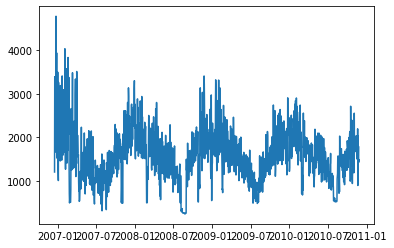

In [14]:
plt.plot(df_daily.index, df_daily['Global_active_power'])

In [15]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [18]:
# resetting the index for df_daily and saving it as another dataframe (df_daily2)
df_daily2 = df_daily.reset_index()
df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [19]:
# we only need the first two columns under df_daily2
df_daily2 = df_daily2[['datetime','Global_active_power']]
df_daily2.head()

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [20]:
# making a new dataframe from df_daily2 but renaming the columns
new_df = df_daily2.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [49]:
x = new_df.tail(365)
y = new_df.head(365)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)

In [51]:
from fbprophet import Prophet
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
# using prophet to predict for the next 12 days
future = model.make_future_dataframe(periods=12, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,2047.601597,1493.636721,2477.759825,2047.601597,2047.601597,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1997.503328
1,2009-11-28,2044.088432,1676.097562,2649.622646,2044.088432,2044.088432,112.066054,112.066054,112.066054,112.066054,112.066054,112.066054,0.0,0.0,0.0,2156.154486
2,2009-11-29,2040.575267,1552.561930,2539.837215,2040.575267,2040.575267,-25.118748,-25.118748,-25.118748,-25.118748,-25.118748,-25.118748,0.0,0.0,0.0,2015.456519
3,2009-11-30,2037.062102,1497.202854,2522.793455,2037.062102,2037.062102,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,0.0,0.0,0.0,2006.674328
4,2009-12-02,2030.035772,1597.018773,2589.757207,2030.035772,2030.035772,52.629391,52.629391,52.629391,52.629391,52.629391,52.629391,0.0,0.0,0.0,2082.665163
5,2009-12-03,2026.522607,1493.599747,2503.349795,2026.522607,2026.522607,-60.917089,-60.917089,-60.917089,-60.917089,-60.917089,-60.917089,0.0,0.0,0.0,1965.605518
6,2009-12-04,2023.009442,1473.956934,2451.946951,2023.009442,2023.009442,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1972.911172
7,2009-12-07,2012.469947,1493.867353,2481.722843,2012.469947,2012.469947,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,0.0,0.0,0.0,1982.082173
8,2009-12-08,2008.956782,1519.664764,2469.421011,2008.956782,2008.956782,1.826436,1.826436,1.826436,1.826436,1.826436,1.826436,0.0,0.0,0.0,2010.783218
9,2009-12-11,1998.417286,1449.667056,2434.390381,1998.417286,1998.417286,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1948.319017


In [53]:
# comparing yhat(predictions) and the trends

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,1997.503328,1493.636721,2477.759825,2047.601597,2047.601597,2047.601597
1,2009-11-28,2156.154486,1676.097562,2649.622646,2044.088432,2044.088432,2044.088432
2,2009-11-29,2015.456519,1552.561930,2539.837215,2040.575267,2040.575267,2040.575267
3,2009-11-30,2006.674328,1497.202854,2522.793455,2037.062102,2037.062102,2037.062102
4,2009-12-02,2082.665163,1597.018773,2589.757207,2030.035772,2030.035772,2030.035772
...,...,...,...,...,...,...,...
244,2010-12-03,1618.707056,1097.840168,2113.333001,1668.805325,1668.111444,1669.841963
245,2010-12-04,1784.720864,1316.854228,2262.864516,1672.654810,1671.751623,1673.917059
246,2010-12-05,1651.385546,1131.627026,2144.276948,1676.504295,1675.367484,1677.989880
247,2010-12-06,1649.966005,1175.752308,2160.224143,1680.353779,1678.978133,1682.202733


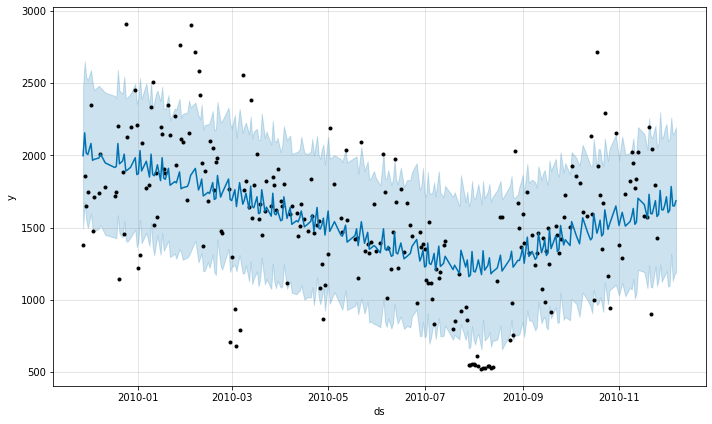

In [54]:
# plotting using the forecast dataframe

model.plot(forecast)
plt.show() 

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
# MAPE
mean_absolute_percentage_error(forecast['trend'], forecast['yhat'])

21.79212967200097

In [26]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(forecast['trend'], forecast['yhat']))
print(rmse)

420.0084246954627


C:\Users\Newton\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


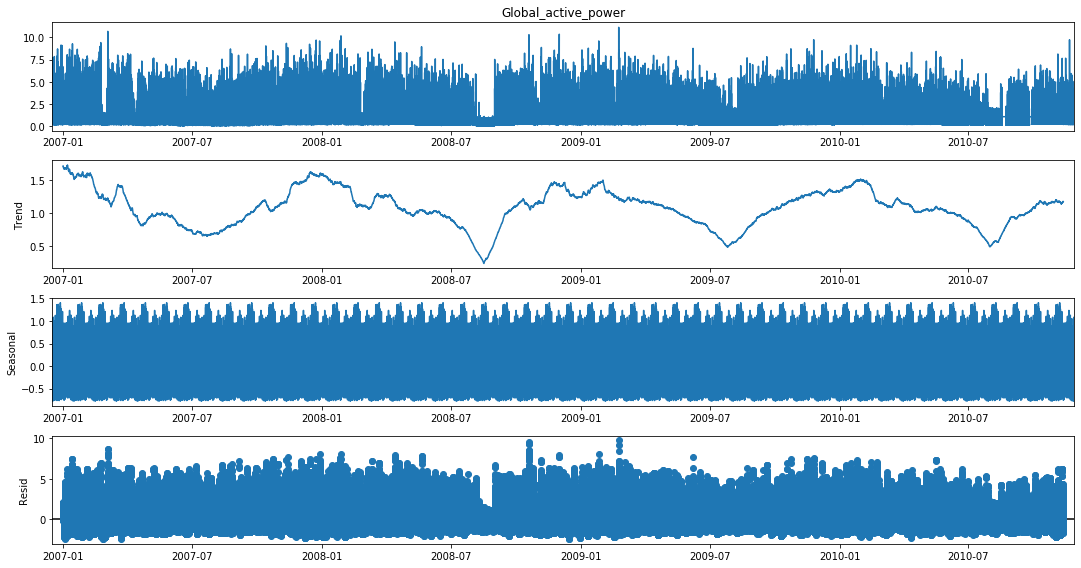

In [27]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30) )
decompose_series.plot()
plt.show()

In [28]:
df_daily3 = df_daily.reset_index()
df_daily3.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [29]:
new_df2 = df_daily3.rename(columns={ 'datetime': 'ds', "Global_active_power": "y", "Global_reactive_power": "add1", "Voltage": "add2", 'Global_intensity': 'add3', 'Sub_metering_1': 'add4', 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'})
new_df2.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [43]:
x = new_df2.tail(365)
y = new_df2.head(365)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)

In [45]:
from fbprophet import Prophet
model = Prophet()
model.fit(x_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
# using prophet to predict for the next 12 days
future = model.make_future_dataframe(periods=12, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,2047.601597,1501.341766,2485.835622,2047.601597,2047.601597,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1997.503328
1,2009-11-28,2044.088432,1632.626801,2630.859137,2044.088432,2044.088432,112.066054,112.066054,112.066054,112.066054,112.066054,112.066054,0.0,0.0,0.0,2156.154486
2,2009-11-29,2040.575267,1507.675782,2498.022311,2040.575267,2040.575267,-25.118748,-25.118748,-25.118748,-25.118748,-25.118748,-25.118748,0.0,0.0,0.0,2015.456519
3,2009-11-30,2037.062102,1465.497533,2503.024389,2037.062102,2037.062102,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,0.0,0.0,0.0,2006.674328
4,2009-12-02,2030.035772,1619.912446,2583.745893,2030.035772,2030.035772,52.629391,52.629391,52.629391,52.629391,52.629391,52.629391,0.0,0.0,0.0,2082.665163
5,2009-12-03,2026.522607,1457.858463,2471.266035,2026.522607,2026.522607,-60.917089,-60.917089,-60.917089,-60.917089,-60.917089,-60.917089,0.0,0.0,0.0,1965.605518
6,2009-12-04,2023.009442,1470.945203,2451.460567,2023.009442,2023.009442,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1972.911172
7,2009-12-07,2012.469947,1511.297402,2492.542382,2012.469947,2012.469947,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,-30.387774,0.0,0.0,0.0,1982.082173
8,2009-12-08,2008.956782,1492.688798,2526.083586,2008.956782,2008.956782,1.826436,1.826436,1.826436,1.826436,1.826436,1.826436,0.0,0.0,0.0,2010.783218
9,2009-12-11,1998.417286,1455.005525,2398.501027,1998.417286,1998.417286,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,-50.098270,0.0,0.0,0.0,1948.319017


In [47]:
# comparing yhat(predictions) and the trends

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,1997.503328,1501.341766,2485.835622,2047.601597,2047.601597,2047.601597
1,2009-11-28,2156.154486,1632.626801,2630.859137,2044.088432,2044.088432,2044.088432
2,2009-11-29,2015.456519,1507.675782,2498.022311,2040.575267,2040.575267,2040.575267
3,2009-11-30,2006.674328,1465.497533,2503.024389,2037.062102,2037.062102,2037.062102
4,2009-12-02,2082.665163,1619.912446,2583.745893,2030.035772,2030.035772,2030.035772
...,...,...,...,...,...,...,...
244,2010-12-03,1618.707056,1122.690028,2134.195861,1668.805325,1667.641710,1669.436900
245,2010-12-04,1784.720864,1293.848925,2277.047606,1672.654810,1671.168941,1673.526561
246,2010-12-05,1651.385546,1161.346957,2162.218132,1676.504295,1674.658882,1677.631113
247,2010-12-06,1649.966005,1158.995304,2134.114636,1680.353779,1678.152840,1681.717748


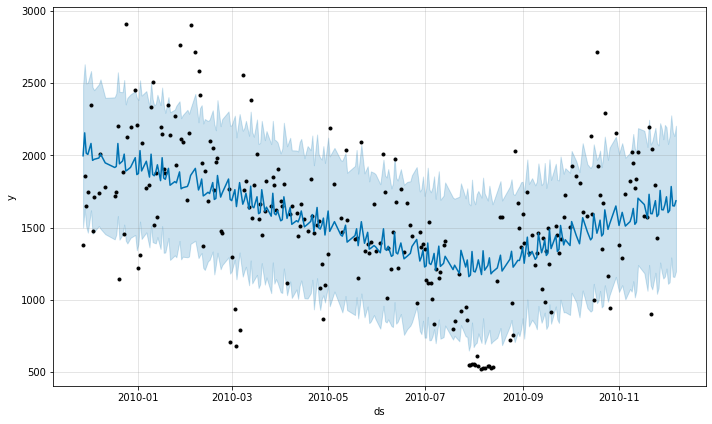

In [48]:
# plotting using the forecast dataframe

model.plot(forecast)
plt.show() 

In [55]:
# MAPE
mean_absolute_percentage_error(forecast['trend'], forecast['yhat'])

3.190018778021747

In [56]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(forecast['trend'], forecast['yhat']))
print(rmse)

58.38913378605311
